## Setup

In [1]:
from __future__ import division, print_function, absolute_import

In [2]:
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
sns.set()

/usr/local/manual/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
from lsst.sims.catalogs.measures.instance import InstanceCatalog
import lsst.sims.catUtils.baseCatalogModels as bcm
from lsst.sims.catalogs.generation.db import CatalogDBObject, DBObject
from lsst.sims.catUtils.baseCatalogModels.GalaxyModels import GalaxyTileObj, GalaxyObj
from lsst.sims.utils import ObservationMetaData

/Users/rbiswas/src/LSST/sims_catalogs_generation/python/lsst/sims/catalogs/generation/db/dbConnection.py:438: UserWarning: Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/Users/rbiswas/src/LSST/sims_catalogs_generation/python/lsst/sims/catalogs/generation/db/dbConnection.py:438: UserWarning: Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')


## Catalogs

In [5]:
observerMetaData = ObservationMetaData(boundType='box',
                                  pointingRA=4.,
                                  pointingDec=0.,
                                  boundLength=0.1)

In [6]:
observerMetaData_1 = ObservationMetaData(boundType='box',
                                  pointingRA=4.,
                                  pointingDec=-4.,
                                  boundLength=0.1)

In [7]:
class galCopy(InstanceCatalog):
    column_outputs = ['galtileid', 'raJ2000', 'decJ2000', 'redshift', 'mass_stellar', 'absmag_r_total']#, 'a_d', 'b_d', 'pa_disk', 'mass_stellar', 'absmag_r_total']
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'a_d': '%8e', 'b_d': '%8e', 'pa_disk': '%8e', 
                        'mass_stellar': '%8e', 'absmag_r_total': '%8e'}

In [8]:
def galIds(tileID, galTileID):
    return galTileID - 100000000* tileID

In [9]:
galaxyTiled = GalaxyTileObj()

/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geopoint'
  return fn(*arg, **kw)


#### On Base Patch

In [10]:
constr='redshift < 0.4'
gBase = galCopy(galaxyTiled, obs_metadata=observerMetaData, constraint=constr)
gBase.write_catalog('gBase.csv')
gBase_df  = pd.read_csv('gBase.csv', delimiter=', ',index_col='#galtileid')
gBase_df.index.name = 'galtileid'
gBase_df.head()

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.


,raJ2000,decJ2000,redshift,mass_stellar,absmag_r_total
galtileid,,,,,
2213505178,0.068678,-0.000148,0.3579,0.001553,-14.28651
2204505754,0.068774,-0.000026,0.3579,0.013143,-16.26211
2200035427,0.068710,-0.000695,0.3586,6.872705,-22.26235
2200424225,0.068674,-0.000686,0.3585,0.630557,-19.69914
2201228260,0.068698,-0.000694,0.3584,0.076684,-18.09178


In [11]:
gBase_df['id'] = galIds(22, gBase_df.index.values)
gBase_df.set_index('id', inplace=True)
gBase_df.head()

,raJ2000,decJ2000,redshift,mass_stellar,absmag_r_total
id,,,,,
13505178,0.068678,-0.000148,0.3579,0.001553,-14.28651
4505754,0.068774,-0.000026,0.3579,0.013143,-16.26211
35427,0.068710,-0.000695,0.3586,6.872705,-22.26235
424225,0.068674,-0.000686,0.3585,0.630557,-19.69914
1228260,0.068698,-0.000694,0.3584,0.076684,-18.09178


#### On a Tile 4 degrees South

In [12]:
gTile_1 = galCopy(galaxyTiled, obs_metadata=observerMetaData_1, constraint=constr)
gTile_1.write_catalog('gTile_1.csv')
gTile1_df  = pd.read_csv('gTile_1.csv', delimiter=', ', index_col='#galtileid')
gTile1_df.index.name = 'galtileid'
gTile1_df.head()

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


,raJ2000,decJ2000,redshift,mass_stellar,absmag_r_total
galtileid,,,,,
2113505178,0.068761,-0.069922,0.3579,0.001553,-14.28651
2104505754,0.068857,-0.069799,0.3579,0.013143,-16.26211
2100035427,0.068795,-0.070468,0.3586,6.872705,-22.26235
2100424225,0.068758,-0.070459,0.3585,0.630557,-19.69914
2101228260,0.068782,-0.070467,0.3584,0.076684,-18.09178


In [13]:
gTile1_df['id'] = galIds(21, gTile1_df.index.values)
gTile1_df.set_index('id', inplace=True)
gTile1_df.rename(columns={'raJ2000':'raJ2000_1', 'decJ2000':'decJ2000_1', 'redshift': 'redshift_1',
                          'mass_stellar':'mass_stellar_1', 'absmag_r_total':'absmag_r_total_1'},
                 inplace=True)
gTile1_df.head()

,raJ2000_1,decJ2000_1,redshift_1,mass_stellar_1,absmag_r_total_1
id,,,,,
13505178,0.068761,-0.069922,0.3579,0.001553,-14.28651
4505754,0.068857,-0.069799,0.3579,0.013143,-16.26211
35427,0.068795,-0.070468,0.3586,6.872705,-22.26235
424225,0.068758,-0.070459,0.3585,0.630557,-19.69914
1228260,0.068782,-0.070467,0.3584,0.076684,-18.09178


In [14]:
merged =  pd.concat([gBase_df, gTile1_df], axis=1)

In [15]:
# Translate the ra values to around 0 for plotting ease
merged['shiftedRA']  = np.where(merged.raJ2000 < 3., merged.raJ2000, merged.raJ2000 - 2.0*np.pi)
merged['shiftedRA_1']  = np.where(merged.raJ2000_1 < 3., merged.raJ2000_1, merged.raJ2000_1 - 2.0*np.pi)

In [16]:
merged.head()

,raJ2000,decJ2000,redshift,mass_stellar,absmag_r_total,raJ2000_1,decJ2000_1,redshift_1,mass_stellar_1,absmag_r_total_1,shiftedRA,shiftedRA_1
id,,,,,,,,,,,,
109,0.068192,0.001182,0.0453,1.502339,-20.97224,0.068270,-0.068593,0.0453,1.502339,-20.97224,0.068192,0.068270
3872,0.068216,0.000852,0.1426,5.148306,-21.93346,0.068295,-0.068922,0.1426,5.148306,-21.93346,0.068216,0.068295
4730,0.069507,-0.001674,0.3248,7.430973,-22.84957,0.069595,-0.071446,0.3248,7.430973,-22.84957,0.069507,0.069595
4967,0.069044,-0.001132,0.3247,2.978661,-22.57799,0.069130,-0.070904,0.3247,2.978661,-22.57799,0.069044,0.069130
5141,0.068321,-0.000491,0.3334,2.842540,-22.87033,0.068403,-0.070266,0.3334,2.842540,-22.87033,0.068321,0.068403


In [17]:
uncommon = merged[merged.isnull().any(axis=1)].copy()

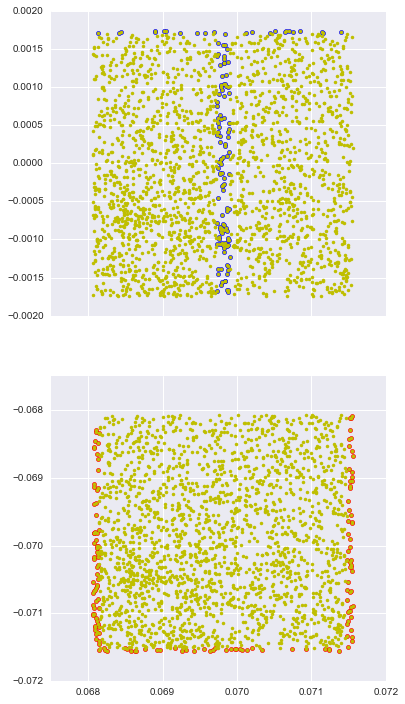

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(6, 12), sharex=True)
ax[0].plot(merged.raJ2000, merged.decJ2000, 'y.')
ax[0].scatter(uncommon.raJ2000, uncommon.decJ2000, color='b')

ax[1].plot(merged.raJ2000_1, merged.decJ2000_1, 'y.')
ax[1].scatter(uncommon.raJ2000_1, uncommon.decJ2000_1, color='r')




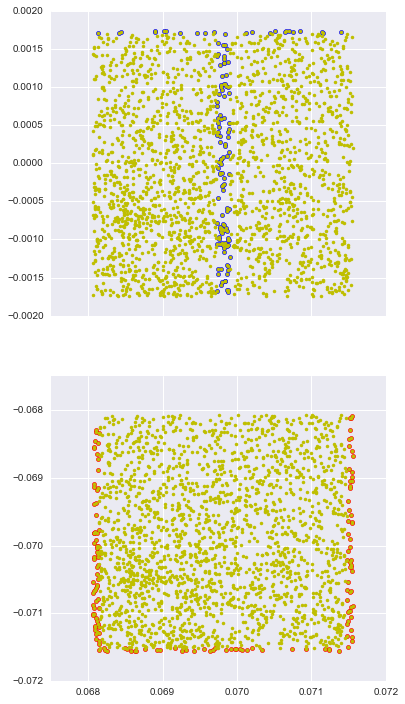

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(6, 12), sharex=True)
ax[0].plot(merged.shiftedRA, merged.decJ2000, 'y.')
ax[0].scatter(uncommon.shiftedRA, uncommon.decJ2000, color='b')

ax[1].plot(merged.shiftedRA_1, merged.decJ2000_1, 'y.')
ax[1].scatter(uncommon.shiftedRA_1, uncommon.decJ2000_1, color='r')



In [20]:
print(len(uncommon)/2., (len(gBase_df) + len(gTile1_df) )/2.)

143.0 2228.0


In [21]:
np.sqrt(2228.)

47.201694884823787

In [22]:
len(merged[merged.shiftedRA_1.isnull()])

134

In [23]:
len(merged[merged.shiftedRA.isnull()])

152

In [24]:
len(merged)

2371

## Tests Galaxies are correctly identified

In [25]:
common = merged[~merged.isnull().any(axis=1)]

In [26]:
np.allclose(common.redshift, common.redshift_1)

True

In [27]:
np.allclose(common.mass_stellar, common.mass_stellar_1)

True

In [28]:
np.allclose(common.absmag_r_total, common.absmag_r_total_1)

True

In [29]:
print(len(common))

2085


## Angular Separations

In [30]:
common.head()

,raJ2000,decJ2000,redshift,mass_stellar,absmag_r_total,raJ2000_1,decJ2000_1,redshift_1,mass_stellar_1,absmag_r_total_1,shiftedRA,shiftedRA_1
id,,,,,,,,,,,,
109,0.068192,0.001182,0.0453,1.502339,-20.97224,0.068270,-0.068593,0.0453,1.502339,-20.97224,0.068192,0.068270
3872,0.068216,0.000852,0.1426,5.148306,-21.93346,0.068295,-0.068922,0.1426,5.148306,-21.93346,0.068216,0.068295
4730,0.069507,-0.001674,0.3248,7.430973,-22.84957,0.069595,-0.071446,0.3248,7.430973,-22.84957,0.069507,0.069595
4967,0.069044,-0.001132,0.3247,2.978661,-22.57799,0.069130,-0.070904,0.3247,2.978661,-22.57799,0.069044,0.069130
5141,0.068321,-0.000491,0.3334,2.842540,-22.87033,0.068403,-0.070266,0.3334,2.842540,-22.87033,0.068321,0.068403


In [31]:
NSelect = 1000
sel = np.random.choice(common.index.values, NSelect*2, replace=False)

In [32]:
split_1 = common.ix[sel[:NSelect]]
split_2 = common.ix[sel[NSelect:]]

In [33]:
print(len(split_1), len(split_2))

1000 1000


In [34]:
split_1

,raJ2000,decJ2000,redshift,mass_stellar,absmag_r_total,raJ2000_1,decJ2000_1,redshift_1,mass_stellar_1,absmag_r_total_1,shiftedRA,shiftedRA_1
id,,,,,,,,,,,,
17091820,0.069190,-0.000982,0.2672,0.000115,-12.60134,0.069276,-0.070754,0.2672,0.000115,-12.60134,0.069190,0.069276
4500972776,0.071364,-0.000739,0.1554,0.011406,-16.05485,0.071281,-0.070514,0.1554,0.011406,-16.05485,0.071364,0.071281
4503936790,0.070202,-0.001564,0.2826,0.012869,-15.71839,0.070114,-0.071335,0.2826,0.012869,-15.71839,0.070202,0.070114
659098,0.068192,0.000178,0.3746,0.133107,-19.13546,0.068273,-0.069596,0.3746,0.133107,-19.13546,0.068192,0.068273
4515947541,0.070130,-0.001655,0.2687,0.000170,-12.91985,0.070042,-0.071427,0.2687,0.000170,-12.91985,0.070130,0.070042
11796575,0.068579,0.000019,0.2874,0.001148,-13.97896,0.068661,-0.069755,0.2874,0.001148,-13.97896,0.068579,0.068661
4503806488,0.070414,-0.001235,0.3927,0.003363,-16.62415,0.070327,-0.071007,0.3927,0.003363,-16.62415,0.070414,0.070327
2646469,0.069716,-0.001616,0.3569,0.004056,-16.70559,0.069805,-0.071387,0.3569,0.004056,-16.70559,0.069716,0.069805
4500007552,0.071194,-0.000987,0.2408,3.249657,-21.89512,0.071110,-0.070761,0.2408,3.249657,-21.89512,0.071194,0.071110


In [35]:
from lsst.sims.utils import haversine

In [36]:
df = pd.DataFrame({'ids_1': split_1.index.values,
                   'ids_2': split_2.index.values,
                   'raJ2000': split_1.raJ2000.values,
                   'shiftedRA':split_1.shiftedRA.values,
                   'decJ2000':split_1.decJ2000.values,
                   'raJ2000_2': split_2.raJ2000.values,
                   'shiftedRA_2': split_2.shiftedRA_1.values,
                   'decJ2000_2':split_2.decJ2000.values,
                   'angsep': haversine(split_1.decJ2000.values, split_1.raJ2000.values, split_2.decJ2000.values, 
                                       split_2.raJ2000.values),
                  'angsep_1': haversine(split_1.decJ2000_1.values, split_1.raJ2000_1.values, split_2.decJ2000_1.values, 
                                       split_2.raJ2000_1.values)}
                   #'angsep_1': haversine(split_1.decJ2000_1, split_1.raJ2000_1, split_2.decJ2000_1, split_2.raJ2000_1)}
                  )

In [37]:
df['ratio'] = df.angsep_1/df.angsep 

In [38]:
df.ratio.describe()

count    1000.000000
mean        0.967045
std         0.045611
min         0.561827
25%         0.941758
50%         0.999996
75%         1.000462
max         1.002551
Name: ratio, dtype: float64

In [39]:
df.ratio.isnull().any()

False

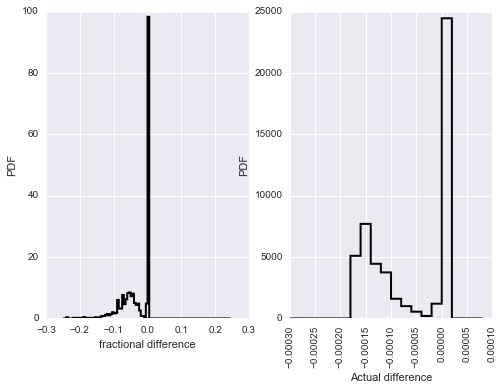

In [40]:
fig, ax = plt.subplots(1, 2)
_ = ax[0].hist(df.ratio.values - 1., bins=np.arange(-0.25, 0.25, 0.005),normed=1,
        histtype='step', alpha=1, lw=2., color='k')
# sns.kdeplot(df.ratio - 1., ax=ax)
ax[0].set_xlabel('fractional difference')
ax[0].set_ylabel('PDF')
_ = ax[1].hist((df.ratio.values - 1.)*df.angsep,normed=1, bins=np.arange(-0.0003, 0.0001, 0.00002),
        histtype='step', alpha=1, lw=2., color='k')
xticks = ax[1].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]


# sns.kdeplot(df.ratio - 1., ax=ax)
ax[1].set_xlabel('Actual difference')
ax[1].set_ylabel('PDF')

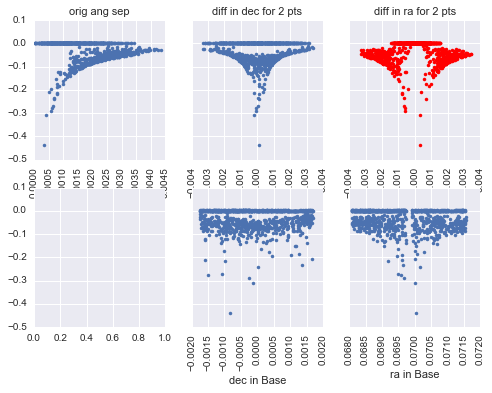

In [41]:
# Use if not using base tile
fig, ax = plt.subplots(2, 3, sharey=True, squeeze=False)
ax[0,0].plot(df.angsep, df.ratio-1, '.')
xticks = ax[0, 0].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[0, 0].set_xlabel('orig ang sep')
ax[0, 0].xaxis.set_label_position('top') 
ax[0, 1].plot(df.decJ2000 - df.decJ2000_2, df.ratio - 1, '.')
ax[0, 1].set_xlabel('diff in dec for 2 pts')
ax[0, 1].xaxis.set_label_position('top') 
xticks = ax[0, 1].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[0, 2].plot(df.raJ2000 - df.raJ2000_2, df.ratio - 1, '.r')
xticks = ax[0, 2].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[0, 2].set_xlabel('diff in ra for 2 pts')
ax[0, 2].xaxis.set_label_position('top') 


ax[1, 1].plot(df.decJ2000, df.ratio - 1, '.')
xticks = ax[1, 1].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[1, 1].set_xlabel('dec in Base')
ax[1, 2].plot(df.raJ2000, df.ratio - 1, '.')
xticks = ax[1, 2].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[1, 2].set_xlabel('ra in Base')


#ax[1,0].plot(df.angsep, (df.ratio -1)* df.angsep, '.')

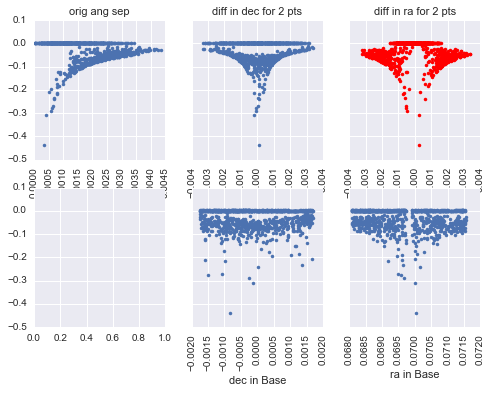

In [42]:
# Use shifts to take care of periodicity of ra newar ra=0.
fig, ax = plt.subplots(2, 3, sharey=True, squeeze=False)
ax[0,0].plot(df.angsep, df.ratio-1, '.')
xticks = ax[0, 0].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[0, 0].set_xlabel('orig ang sep')
ax[0, 0].xaxis.set_label_position('top') 
ax[0, 1].plot(df.decJ2000 - df.decJ2000_2, df.ratio - 1, '.')
ax[0, 1].set_xlabel('diff in dec for 2 pts')
ax[0, 1].xaxis.set_label_position('top') 
xticks = ax[0, 1].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[0, 2].plot(df.shiftedRA - df.shiftedRA_2, df.ratio - 1, '.r')
xticks = ax[0, 2].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[0, 2].set_xlabel('diff in ra for 2 pts')
ax[0, 2].xaxis.set_label_position('top') 


ax[1, 1].plot(df.decJ2000, df.ratio - 1, '.')
xticks = ax[1, 1].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[1, 1].set_xlabel('dec in Base')
ax[1, 2].plot(df.shiftedRA, df.ratio - 1, '.')
xticks = ax[1, 2].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[1, 2].set_xlabel('ra in Base')


#ax[1,0].plot(df.angsep, (df.ratio -1)* df.angsep, '.')

In [43]:
print(len(df))

1000


In [44]:
print(len(merged))

2371


## Scratch

In [45]:
df.raJ2000.max()

0.071557229999999999

In [46]:
df.raJ2000.min()

0.068071060000000003

In [47]:
gTile1_df.raJ2000_1.min()

0.068069290000000005

In [48]:
gTile1_df.raJ2000_1.max()

0.071554409999999999

In [49]:
gBase_df.raJ2000.min()

0.068068139999999999

In [50]:
np.degrees(gBase_df.raJ2000.max())

4.0999272726469194